In [32]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Review of the Derivative

### The Tangent

If you recall from trigonometry the definition of the tangent (hint: SOHCAH**TOA**)

$$\tan \theta = \frac{\text{opposite}}{\text{adjacent}} = \frac{\text{rise}}{\text{run}} = \frac{\Delta y}{\Delta x}$$

In other words, the tangent of an angle *is the slope of the hypotenuse*!

<img src="https://www.evernote.com/l/AAFlH87z8JRMX55lgZ9zo0i3uB2XLrzuoYgB/image.png" width="300px">

### The Slope more generally
Identifying the slope for a linear function is pretty simple. 

For a linear function, this is the classic **rise over run** and when written:

$f(x) = \beta_1x+\beta_0$ (or $f(x) = mx+b$)

the slope of $f(x)$ is $\beta_1$ or $m$.

This value, the slope of the tangent line, is the rate of change for the function.

For a more complicated function, we think of the slope at a point as the slope of the tangent line at that point. Intuitively, the rate of change for a linear function is constant. For a more complicated function the rate of change itself may be changing.

### The Derivative: 

In calculus this is known as the derivative.  

In Calculus, this is known as the derivative. It's given by

$$\lim_{h\to0}\frac{f(x+h)-f(x)}{h}$$


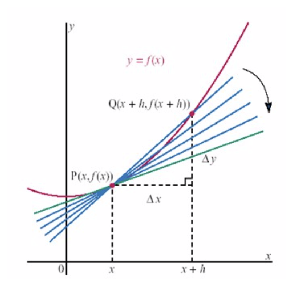

In [169]:
img = plt.imread('../illustration1.png')

plt.figure(figsize = (5,5))
plt.imshow(img, aspect = 'auto')

plt.axis('Off')
plt.show()

and for polynomials, the derivative can be computed analytically for

$$f(x) = ax^p$$

as 

$$f'(x) = \frac{d}{dx}ax^p = a\cdot p x^{p-1}$$

### Special Note: the derivative of a constant is zero.
If  𝑓(𝑥)=𝑎
f
(
x
)
=
a
  where  𝑎∈ℝ
a
∈
R
  i.e.  𝑎
a
  is a number
𝑓′(𝑥)=0
f
′
(
x
)
=
0
 
This is very intuitive. The derivative is a rate of change. If a function is constant, it is not changing, therefore the rate of change is zero.

As we are computational mathematicians, we will not be finding the derivative analytically.

We can estimate the derivative of a function using the **difference quotient**. 

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

We can get a better and better estimate for the slope of the tangent by using a smaller and smaller value for `h`.

In [18]:
def difference_quotient(f, x, h=1E-10):
    return float((f(x + h) - f(x)) / (h))

### Modeling the difference quotient

example: $y = f(x) = (x-2)^2$

In [19]:
f = lambda x: (x-2)**2

In [20]:
xx = np.linspace(-5,5)

In [21]:
def secant_line(f, x, h):
    return (x-h,x+h),(f(x-h), f(x+h))

Let's say we want the slope of the line at $x=3$.

4.0
3.75
3.5
3.25
3.0
2.75
2.5
2.25


(-1, 10)

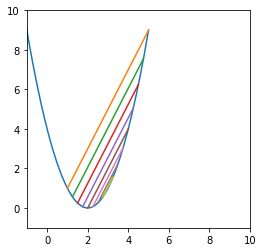

In [22]:
fig = plt.figure(figsize=(4,4))
plt.plot(xx, f(xx))
_ = [plt.plot(*secant_line(f, 3, h)) for h in (2,1.75,1.5,1.25, 1, .75, .5, .25)]
_ = [print(difference_quotient(f, 3, h)) for h in (2,1.75,1.5,1.25, 1, .75, .5, .25)]
plt.ylim(-1,10)
plt.xlim(-1,10)

# Iterative Techniques in General

Gradient Descent is a technique belonging to a larger family of iterative problem solvers. 

**Iteration** means to repeat a process with the aim of approaching a desired result. 

Each repetition of the process, also called an **iteration** is used as the starting point for the next iteration ... it's a **recurrence relation**.

The procedure as a whole generates a sequence of improving approximations, in which each approximation is derived from the previous one. 

In other words, we use a recurrence relation to derive a better and better approximation to some value. 

# Newton's Method

Also known as the [Newton-Raphson Method](https://en.wikipedia.org/wiki/Newton%27s_method). One of the Oldest Iterative Techniques. It is a method for finding approximation to the root of a function.

### a root

$$x: f(x) = 0$$

Let's look at

$$f(x) = (x - 1)(x^2 + 0.1)$$

I have chosen this function intentionally because I know that it has one and only one root at $x=1$.

Note that at $x=1$, we have $f(1)=(0)(1.1)=0$ and that the second term $x^2+0.1$ will never be equal to zero.

In [26]:
f = lambda x: (x - 1)*(x**2+0.1)

#### Problem Statement
Given polynomial function of a single variable, we seek the **roots** of the function i.e. the values of $x$ for which the function evaluates to 0.

$$x: f(x) = 0$$

#### Solution Statement 
In order to solve this problem, we will use Newton's Method (or the Newton-Raphson Technique) to find successively better approximations to the roots.

_Newton's Method_
1. Visualize the function and find a guess that is "close" to the root
2. Guess a value for the root, $x_0$.
3. If the initial guess is close, we can find a better approximation

   $$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$
   
4. Repeat until a sufficiently accurate value is reached.

   $$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$

In order to handle the derivative of our function, we will use the numerical approximation, the **difference quotient**

$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

This should be sufficiently accurate for small enough values of $h$.

In [28]:
def newtons_method_iteration(f, x):
    return x - (f(x)/difference_quotient(f, x))

### An Error Metric 

**Metric:** In order to evaluate the success of our root finding, we will examine the absolute error of the root approximation, where

$$\text{err}(x_{est}) = \rvert f(x_{est}) \rvert$$

We can use this estimate because we expect the value of $f(x_{est})$ to be zero, therefore, $\rvert f(x_{est}) \rvert$ is how far off from zero our estimate is.

In [29]:
nm_error = lambda f, x: np.abs(f(x))

### Benchmark 


Benchmark: We will set an error value of  10−4
10
−
4
 . When our error is less than this, we can stop iterating.

### Step 1.  Visualize the Function

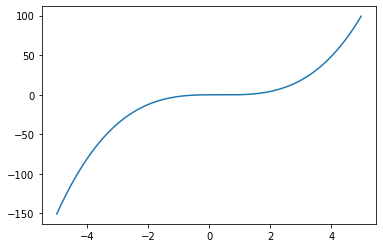

In [34]:
xx = np.arange(-5,5,0.02)
yy = f(xx)

plt.plot(xx, yy, label='$f(x)$')


### Step 2: Make an Initial Guess

try $x = -1$

In [36]:
x_0 = -1
y_0 = f(x_0)
m = difference_quotient(f, x_0, h=1E-10)

#### First iteration using Newton's method

In [38]:
x_1 = newtons_method_iteration(f, x_0)
x_1

-0.5686274866723139

In [39]:
nm_error(f, x_1)

0.6640583972262247

#### Not quite ... 

### Step 3: Keep Iterating 

In [41]:
def nm_line(f, x_i):
    m = difference_quotient(f, x_i)
    return lambda x: m*(x - x_i) + f(x_i)

In [42]:
line_0 = nm_line(f, x_0)
line_0_vec = line_0(xx)

Text(0.5, 1.0, 'First Iteration')

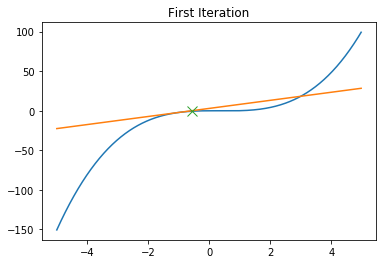

In [44]:
plt.plot(xx, yy, label='$f(x)$')
plt.plot(xx, line_0_vec, label='Line$_0$')
plt.plot(x_1, 0, 'x', ms=10)
plt.title("First Iteration")

In [45]:
x_2 = newtons_method_iteration(f, x_1)
("root prediction: {:0.4f}, error: {:0.4f}"
 .format(x_2, nm_error(f, x_2)))

'root prediction: -0.2678, error: 0.2177'

In [46]:
line_1 = nm_line(f, x_1)
line_1_vec = line_1(xx)

Text(0.5, 1.0, 'Second Iteration')

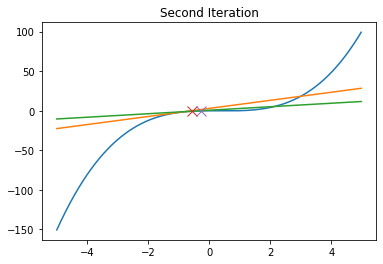

In [48]:
plt.plot(xx, yy, label='$f(x)$')
plt.plot(xx, line_0_vec, label='Line$_0$')
plt.plot(xx, line_1_vec, label='Line$_1$')
plt.plot(x_1, 0, 'x', ms=10)
plt.plot(x_2, 0, 'x', ms=10)
plt.title("Second Iteration")

### 7 Iterations

In [53]:
x_3 = newtons_method_iteration(f, x_2)
("root prediction: {:0.4f}, error: {:0.4f}"
 .format(x_2, nm_error(f, x_2)))
x_4 = newtons_method_iteration(f, x_3)
("root prediction: {:0.4f}, error: {:0.4f}"
 .format(x_2, nm_error(f, x_2)))
x_5 = newtons_method_iteration(f, x_4)
("root prediction: {:0.4f}, error: {:0.4f}"
 .format(x_2, nm_error(f, x_2)))
x_6 = newtons_method_iteration(f, x_5)
("root prediction: {:0.4f}, error: {:0.4f}"
 .format(x_6, nm_error(f, x_6)))
x_7 = newtons_method_iteration(f, x_6)
("root prediction: {:0.4f}, error: {:0.4f}"
 .format(x_7, nm_error(f, x_7)))

'root prediction: 1.0012, error: 0.0014'

In [70]:
line_2 = nm_line(f, x_2)
line_2_vec = line_2(xx)

line_3 = nm_line(f, x_3)
line_3_vec = line_3(xx)

line_4 = nm_line(f,x_4)
line_4_vec = line_4(xx)

line_5 = nm_line(f, x_5)
line_5_vec = line_5(xx)

line_6 = nm_line(f, x_6)
line_6_vec = line_6(xx)

Text(0.5, 1.0, 'Sixth Iteration')

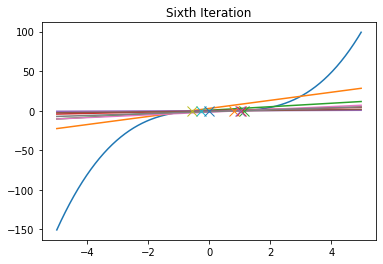

In [71]:
plt.plot(xx, yy, label='$f(x)$')
plt.plot(xx, line_0_vec, label='Line$_0$')
plt.plot(xx, line_1_vec, label='Line$_1$')
plt.plot(xx, line_2_vec, label='Line$_2$')
plt.plot(xx, line_3_vec, label='Line$_3$')
plt.plot(xx, line_4_vec, label='Line$_4$')
plt.plot(xx, line_5_vec, label='Line$_5$')
plt.plot(xx, line_6_vec, label='Line$_6$')
plt.plot(x_1, 0, 'x', ms=10)
plt.plot(x_2, 0, 'x', ms=10)
plt.plot(x_3, 0, 'x', ms=10)
plt.plot(x_4, 0, 'x', ms=10)
plt.plot(x_5, 0, 'x', ms=10)
plt.plot(x_6, 0, 'x', ms=10)
plt.plot(x_7, 0, 'x', ms=10, )
plt.title("Sixth Iteration")


### Exploring the Error

In [74]:
x_est = [x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7]
x_est

[-1,
 -0.5686274866723139,
 -0.26777662175902606,
 -0.011879949714335869,
 0.8040977442876762,
 1.143025303751025,
 1.0269770900644466,
 1.0012352736243193]

In [75]:
nm_error(f, -1)

2.2

In [76]:
x_i = -1
error = nm_error(f, -1)
errors = [error]
print("{:0.4f} {:0.4f} ".format(x_i, error))

for i in range(8):
    x_i = newtons_method_iteration(f, x_i)
    error = nm_error(f, x_i)
    errors.append(error)
    print("{:0.4f} {:0.4f} ".format(x_i, error))

-1.0000 2.2000 
-0.5686 0.6641 
-0.2678 0.2177 
-0.0119 0.1013 
0.8041 0.1463 
1.1430 0.2012 
1.0270 0.0311 
1.0012 0.0014 
1.0000 0.0000 


### Plotting the Error

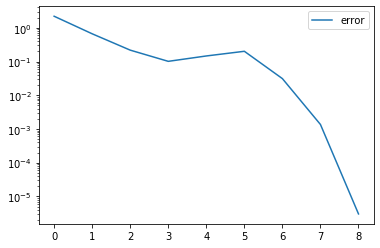

In [77]:
plt.plot(range(9), errors, label='error')

plt.yscale('log')
plt.legend()

In [79]:
#### Plotting our guesses

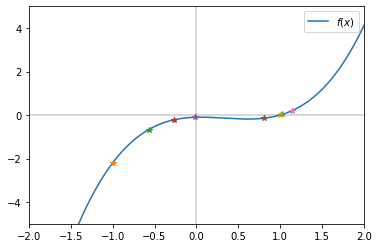

In [78]:
plt.plot(xx, yy, label='$f(x)$')

x_est = -1
for i in range(8):
    plt.plot(x_est, f(x_est), '*')
    x_est = newtons_method_iteration(f, x_est)

plt.xlim(-2,2)
plt.ylim(-5,5)
plt.axvline(c='black', linewidth=0.3)
plt.axhline(c='black', linewidth=0.3)
plt.legend()

### Completing the Problem

We found the root, $x=1$.

# The Gradient!!!!!!!!!!!!!!

### The Derivative of a Multi-Variable Function

Consider the following function

$$f(x,y) = x^2 + y^2$$

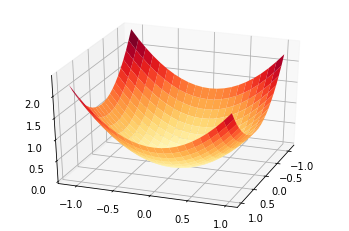

In [81]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')

xx = np.arange(-1.1, 1.1, 0.1)
yy = np.arange(-1.1, 1.1, 0.1)
X, Y = np.meshgrid(xx, yy)

Z = X**2 + Y**2

surf = ax.plot_surface(X, Y, Z, 
                       rstride=1, 
                       cstride=1, 
                       cmap='YlOrRd')
ax.view_init(30, 20)

We can no longer think of the derivative of this function as before. 

The function itself evaluates to a single value, in this case the $z$-axis or height of the plot above.

But it is a function of two variables. If we think of moving along the surface, we can move in two directions.

Our derivative is going to need a value in each direction. 

The derivative of $f(x,y)$ is going to be a vector with two values. 

The vector of these values, one for each variable in the function, is the **Gradient**.

## The Partial Derivative of a Multi-Variable Function

The partial derivative of a multi-variable function is the derivative of the function with respect to a single variable **with all other variables held constant**.

Consider the bowl,

$$f(x,y) = x^2 + y^2$$

To find the partial derivative of $f$ with respect to $x$, we hold $y$ constant.

$$\partial f_x = 2x$$

We lose the $y$ term because $y$ is constant with respect to $x$ and the derivative of a constant is zero.

By the same token 

$$\partial f_y = 2y$$

Armed with these two partial derivatives, we have our gradient

$$\nabla f = (2x, 2y)$$

$\nabla$ is a symbol called "nabla" and means "the gradient of".

### Define our function and treat its inputs as a vector

In [86]:
f = lambda x: x[0]**2 + x[1]**2
f((0,0)), f((1,-2))

(0, 5)

### Define the partial difference quotient

In [87]:
def partial_difference_quotient(f, v, i, h=10E-10):
    # add h to just the ith element of v
    w = [v_j + (h if j == i else 0) 
         for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

### Define the gradient

In [97]:
def grad(f, v, h=10E-10):
    return [partial_difference_quotient(f, v, i)
            for i, _ in enumerate(v)]

In [98]:
def plot_grad(f, v):
    this_grad = grad(f, v)
    plt.arrow(v[0], v[1], 
              this_grad[0]-v[0], this_grad[1]-v[1],
              linewidth=0.1,
              head_width=0.1,
              head_length=0.1)

In [99]:
print(grad(f, (0,.2)))
print(grad(f, (.1,.12)))
print(grad(f, (.3,.2)))

[0.0, 0.3999999984016789]
[0.19999999920083944, 0.24000000251045425]
[0.5999999941330714, 0.4000000053405728]


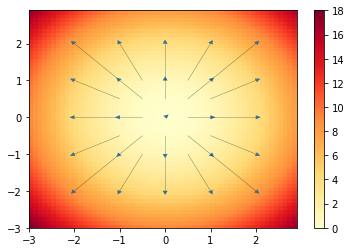

In [100]:
X = np.arange(-3,3,.1)
Y = np.arange(-3,3,.1)
Z = [[x_i**2 + y_i**2 for x_i in X] for y_i in X]
plt.pcolormesh(X, Y, Z, cmap='YlOrRd')
plt.colorbar() #need a colorbar to show the intensity scale

for x_i in [-1,-0.5,0,0.5,1]:
    for y_i in [-1,-0.5,0,0.5,1]:
        plot_grad(f, (x_i, y_i))



## Properties of the Gradient

1. The direction of the gradient is the direction of the steepest slope at a given point i.e. the direction of the greatest increase of a function.
1. The steepness of the slope at that point is the magnitude (or length) of the gradient vector.
1. The opposite of the gradient i.e. $-\nabla f$ will point in the direction of the greatest decrease of a function.
   - another way to say this is that $f(a)$ will decrease the fastest at $a$ in the direction of the negative gradient

### A Field of Gradients

It is helpful to visualize the gradient of a function as a field of gradients. 

Here we visualize a field of negative gradients.

<img src="https://www.evernote.com/l/AAHXQ1qhi0pKAaLfKbqANbL0WkzF0SLoxr4B/image.png" width=500px>

One can imagine dropping a marble onto this surface. In an ideal situation, it will trace a path described by the gradient.

<img src=https://www.evernote.com/l/AAE_JRIyJXZHBpGEFNDIvSWEb1W4pCq_BtEB/image.png width=500px>

We can use this property of the gradient to our advantage when attempting to minimize a function, by simply following the path of greatest descent from every point at which we stand.

# Optimization of a Function via Gradient Descent

### Domain and Data

This problem comes from the field of optimization. We will typically be given a multi-variable function. Here we consider a bowl, 

$$f(x,y) = x^2 + y^2$$

Henceforth, we will refer to $x$ and $y$ as $x_1$ and $x_2$ and together they are

$$\mathbf x = (x_1, x_2)$$

with

$$f(\mathbf x) = x_1^2 + x_2^2$$

In [102]:
f = lambda v: sum([x_i**2 for x_i in v])

### Problem Statement
We seek a local minimum to a multi-variable function, which is to say, we seek the values of our input variable that will yield a minimal value of our function.

### Solution Statement

In simple cases, the minimum of a function can be found by setting the derivative equal to zero and solving analytically.

To solve this problem, we use an iterative optimization algorithm known as the Gradient Descent. 

_Gradient Descent_
1. (Optional) Visualize the function
2. Choose a learning rate for the descent e.g. $\gamma=0.1$ 
3. Randomly select an initial vector value for our function e.g. 

$$\mathbf x_0 = (.332,.562)$$
   
4. Find the gradient of the $f$ at $\mathbf x$ i.e. $\nabla f(\mathbf{x}_0)$

5. $\mathbf{x}_1$ will be a better approximation to a minima, where $\mathbf{x}_1$ is

   $$\mathbf{x}_1 = \mathbf{x}_0 - \gamma \nabla f(\mathbf{x}_0)$$
   
4. Repeat until a sufficiently accurate value is reached.

   $$\mathbf{x}_{n+1} = \mathbf{x}_n - \gamma \nabla f(\mathbf{x}_n)$$

In [129]:
def grad(f, v, h=10E-10):
    return np.array([partial_difference_quotient(f, v, i)
                     for i, _ in enumerate(v)])

In [130]:
def gradient_descent_iteration(f, v, gamma=0.1):
    return v - gamma*grad(f,v)                      # step size function with applied learning rate

### Metric

To measure the performance of our descent we will examine the difference between successive steps. When the difference falls below a certain threshold, we can consider the descent to have settled into a minimum.

In [131]:
def grad_magnitude(gradient):
    return np.sqrt(sum([x_i**2 for x_i in gradient]))
    
def grad_precision(grad_1, grad_2):
    return np.abs(grad_magnitude(grad_2)-
                  grad_magnitude(grad_1))

### Benchmark

We will set this difference at $10^{-2}$.

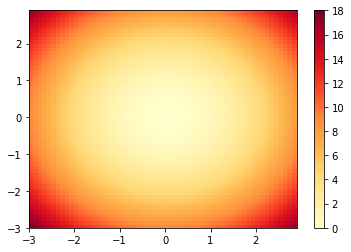

In [132]:
X_1 = np.arange(-3,3,.1)
X_2 = np.arange(-3,3,.1)
F_X = [[x_1_i**2 + x_2_i**2 
        for x_1_i in X_1] 
       for x_2_i in X_2]

plt.pcolormesh(X_1, X_2, F_X, cmap='YlOrRd')
plt.colorbar() #need a colorbar to show the intensity scale

In [133]:
gamma = 0.1

### Make an Initial Guess

In [134]:
x_0 = np.array((.332,.562))

In [135]:
x_1 = gradient_descent_iteration(f, x_0, gamma=gamma)
x_1

array([0.2656    , 0.44960001])

(-0.6, 0.6)

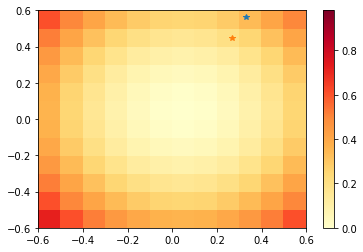

In [136]:
X_1 = np.arange(-.7,.7,.1)
X_2 = np.arange(-.7,.7,.1)
F_X = [[x_1_i**2 + x_2_i**2 
        for x_1_i in X_1] 
       for x_2_i in X_2]

plt.pcolormesh(X_1, X_2, F_X, cmap='YlOrRd')
plt.plot(x_0[0], x_0[1], '*')
plt.plot(x_1[0], x_1[1], '*')

plt.colorbar() 
plt.ylim(-.6,.6)
plt.xlim(-.6,.6)

In [137]:
x_est = x_1
x_ests = []
for i in range(5):
    x_est = gradient_descent_iteration(f, x_est)
    x_ests.append(x_est)
    print(x_est)


[0.21248    0.35968001]
[0.169984 0.287744]
[0.1359872 0.2301952]
[0.10878976 0.18415616]
[0.08703181 0.14732493]


### Five more iterations 

(-0.6, 0.6)

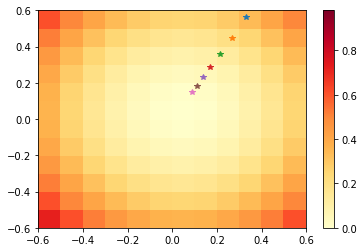

In [138]:
X_1 = np.arange(-.7,.7,.1)
X_2 = np.arange(-.7,.7,.1)
F_X = [[x_1_i**2 + x_2_i**2 
        for x_1_i in X_1] 
       for x_2_i in X_2]

plt.pcolormesh(X_1, X_2, F_X, cmap='YlOrRd')
plt.plot(x_0[0], x_0[1], '*')
plt.plot(x_1[0], x_1[1], '*')
for x in x_ests:
    plt.plot(x[0], x[1], '*')

plt.colorbar()
plt.ylim(-.6,.6)
plt.xlim(-.6,.6)

### Iterations and Gradient Precision

In [139]:
x_est = np.array((.332,.332))
gd_precs = []
for i in range(20):
    last_x_est = x_est
    x_est = gradient_descent_iteration(f, x_est)
    gd_prec = grad_precision(last_x_est, x_est)
    gd_precs.append(gd_prec)
    print("{:30} {:0.10f} ".format(str(x_est), gd_prec))

[0.2656 0.2656]                0.0939037836 
[0.21248 0.21248]              0.0751230245 
[0.169984 0.169984]            0.0600984192 
[0.1359872 0.1359872]          0.0480787354 
[0.10878976 0.10878976]        0.0384629877 
[0.08703181 0.08703181]        0.0307703909 
[0.06962545 0.06962545]        0.0246163124 
[0.05570036 0.05570036]        0.0196930500 
[0.04456028 0.04456028]        0.0157544400 
[0.03564823 0.03564823]        0.0126035519 
[0.02851858 0.02851858]        0.0100828415 
[0.02281487 0.02281487]        0.0080662732 
[0.01825189 0.01825189]        0.0064530186 
[0.01460151 0.01460151]        0.0051624149 
[0.01168121 0.01168121]        0.0041299319 
[0.00934497 0.00934497]        0.0033039455 
[0.00747597 0.00747597]        0.0026431564 
[0.00598078 0.00598078]        0.0021145251 
[0.00478462 0.00478462]        0.0016916201 
[0.0038277 0.0038277]          0.0013532961 


### Plotting the Gradient Descent Error

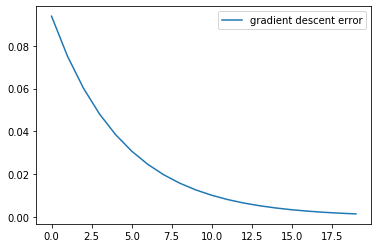

In [140]:
plt.plot(range(len(gd_precs)), gd_precs, label='gradient descent error')
plt.legend()

# So Why Gradient Descent?

### Prepare some noisy sample data and plot it

We are looking to create a dummy dataset to play with. We want it to be linear but noisy. Our underlying equation is

$$f(x) = \beta_1x+\beta_0 + \epsilon$$

Where $\beta_1$ and $\beta_0$ are set values but $\epsilon$ is randomly generated noise. 

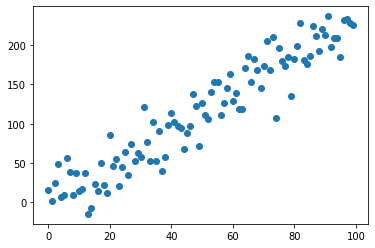

In [124]:
xx = np.arange(100)

np.random.seed(42)

# underlying values
beta_0 = 3.3
beta_1 = 2.3

# noise factor 
gamma = 25 

linear_function = lambda x: beta_1*x + beta_0

# from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1
noise = gamma*np.random.randn(100) 

yy = linear_function(xx) + noise
plt.scatter(xx, yy)

Looking at the data, it seems pretty clear that there is a linear trend (pretend you don't know that there is). 


In order to make predictions on new data, we might propose that we use a linear model

$$\hat{f}(x) = \hat{\beta}_1x+\hat{\beta}_0$$

where $\hat{\beta}_1$ and $\hat{\beta}_0$ represent our estimates of the actual parameters in the underlying linear function.

In [125]:
prediction_function = lambda beta_0, beta_1, x: beta_1*x + beta_0

We can use this `predict` function to try to fit a model to our data. 

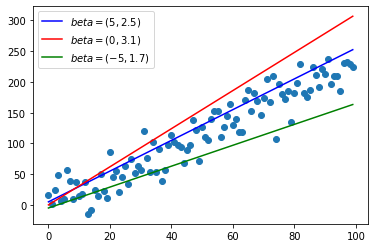

In [141]:
predictions_1 = [prediction_function( 5, 2.5, x_i) for x_i in xx]
predictions_2 = [prediction_function( 0, 3.1, x_i) for x_i in xx]
predictions_3 = [prediction_function(-5, 1.7, x_i) for x_i in xx]
plt.scatter(xx, yy)
plt.plot(xx, predictions_1, c='b', label='$beta=(5,2.5)$')
plt.plot(xx, predictions_2, c='r', label='$beta=(0,3.1)$')
plt.plot(xx, predictions_3, c='g', label='$beta=(-5,1.7)$')
plt.legend()

## Given a starting point (initial estimate of our coeffiecients), is there a way to determine a set of minimum coefficients that reduce the loss function and determine the best fit line?  


### What is our loss function: We will use some of squared residuals to determine our loss 

#### Why yes there is! 

The concept of the gradient can be applied to iteratively find a lower cost by and select new coefficients that have a slighltly lower cost

$ SSE = ((y - (\hat{\beta}_1x + \hat{\beta}_0)) ^2 $

We then take the derivative of SSE with respect to the intercept $\hat{\beta}_0$ and the with respect to the slope $\hat{\beta}_1$  

### This is taking a gradient!  

We then plug these results into a Step Size function like before (see `grad_descent_function`)

In [160]:
from sklearn.linear_model import LinearRegression, SGDRegressor

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [151]:
from sklearn.datasets import load_boston
boston = load_boston()
print (boston.data.shape)
print (boston.feature_names)
print (np.max(boston.target), np.min(boston.target), np.mean(boston.target))

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
50.0 5.0 22.532806324110677


In [164]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [165]:
X, y = boston.data, boston.target
X.shape, y.shape

((506, 13), (506,))

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

SGD = SGDRegressor()
SGD.fit(X_train, y_train)
print(SGD.score(X_train, y_train))
print(SGD.score(X_test, y_test))

0.7687915886341263
0.63001763763016


In [162]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

LR = LinearRegression()
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.769769948874176
0.6354638433200902
